# Interest point
- Has rich image(brightness variation, color variation,etc.) within the local window
- Has well-defined representation(signature) for matching/ comparing with other points
- Has a wall-defined position in the image
- Should be invariant to image rotation and scaling
- Should be insensitive to lighting changes

$\Rightarrow$ Using Blob as interest point cause of its fixed position and definite size
We need to:\
- Locate  the blob 
- Determine its size
- Determine its orientation
- Formulate a description or signature that is independent of size and orientation

Characteristic Scale: the $\sigma$ at which $\theta$- normalized 2nd derivative attains its extreme value\
Characteristic Scale $\propto$ Size of Blob

Selecting sigmas to generate the scale-space:\
$\sigma_k= \sigma_0.s^k$ k=0,1,2,3,...\
where:
- s: constant multiplier
- $\sigma_0$: initial scale
NLog is used as the 2D equivalent for Blob Detection

Convole the image using NLog at many scale $\sigma$
Find:\
(x*,y*,$\sigma$*)=$\displaystyle \argmax_{x,y,\sigma} |\sigma^2 dn_{\sigma}^2  * I(x,y)|$

DoG $\approx$(s-1) NLoG

SIFT scale invariance and orientation invariance

Principal Orientation
Using orient but not magnitude because the magnitude is sensitive to lighting, gain of camera,...\
discriptor is given point, how can we describe those

In Descriptor representation:
- The feature vector is modified to reduce the effects of illumination change. First,
the vector is normalized to unit length. So this contrast
change will be canceled by vector normalization
- Reduce the influence of large gradient magnitudes by thresholding the values in the unit feature vector to each be no larger than
0.2, and then renormalizing to unit length.
## Summary:
#### Scale-space extrema detection → Scale → Orient → Keypoint descriptor → Using metrics to matching

More information:
- https://www.youtube.com/watch?v=ram-jbLJjFg&list=PL2zRqk16wsdqXEMpHrc4Qnb5rA1Cylrhx&index=15
- https://www.youtube.com/watch?v=NPcMS49V5hg

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

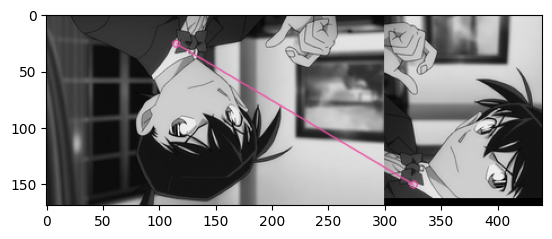

In [19]:
sift=cv2.SIFT_create()
bf=cv2.BFMatcher(cv2.NORM_L2,crossCheck=True)
img1=cv2.imread('./img/Shinichi_Kudo.png')
img2=cv2.imread('./img/Shinichi_Kudo_copy.png')
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
keypoints_1,descriptor_1=sift.detectAndCompute(img1,None)
keypoints_2,descriptor_2=sift.detectAndCompute(img2,None)
matches=bf.match(descriptor_1,descriptor_2)
matches=sorted(matches,key=lambda x:x.distance)
img3=cv2.drawMatches(img1,keypoints_1,img2,keypoints_2,matches[:1],img2,flags=2)
plt.imshow(img3)


In [2]:
import time

#sift
sift = cv2.SIFT_create()

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)


cap = cv2.VideoCapture(0)

while cap.isOpened():
    # read images
    suc, img1 = cap.read()
    img2 = img1
    #img1 = cv2.imread('pencil3.jpg')  
    #img2 = cv2.imread('pencil3.jpg') 

    start = time.time()

    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    end = time.time()
    totalTime = end - start

    fps = 1 / totalTime
    #print("FPS: ", fps)
    

    img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:2], img2, flags=2)
    #plt.imshow(img3),plt.show()
    cv2.putText(img3, f'FPS: {int(fps)}', (20,450), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0), 2)
    cv2.imshow('SIFT', img3)

    if cv2.waitKey(5) & 0xFF == 27:
        break


cap.release()

: 